# EXPLORATORY DATA ANALYSIS 
# Case Study - Titanic Dataset
# SURVIVAL ANALYSIS

# STEPS
* Understand the Dataset
* Data Inspection
* Data Cleaning
* Univariate Analysis
* Outlier Detection
* Bivariate Analysis
* Multivariate Analysis
* Correlation Analysis
* Summarize Insights

# import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
print(dir(sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_base', '_compat', '_core', '_docstrings', '_orig_rc_params', '_statistics', '_stats', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'displot', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'ecdfplot', 'external', 'get_data_home', 'get_dataset_names', 'heatmap', 'histplot', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'matrix', 'miscplot', 'move_legend', 'mpl', 'mpl_palette', 'pairplot', 

# Load the dataset

In [8]:
a=sns.get_dataset_names()

In [12]:
a

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [14]:
data= sns.load_dataset('titanic')

In [16]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#  Introduction to the Dataset
* The dataset analyzed in this report originates from the well-known Titanic disaster, which occurred on April 15, 1912. It provides detailed information about the passengers aboard the Titanic, including their demographics, socio-economic status, and survival outcomes. The dataset contains 891 rows and 15 columns, with each row representing a unique passenger.
# Purpose of Analysis
The purpose of this analysis is to explore the dataset and uncover patterns and trends related to survival, passenger demographics, and socio-economic factors. The insights derived from this analysis can be useful for understanding the factors that influenced survival during the Titanic disaster.



# Data Understanding

In [339]:
data.head(10) # To see the first 10 rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [340]:
data.tail(10) # To see the last 10 rows.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


# DATA INSPECTION

# Shape

In [343]:
data.shape

(891, 15)

# Basic Information

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [346]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [347]:
data.dtypes.value_counts()

object      5
int64       4
float64     2
bool        2
category    1
category    1
Name: count, dtype: int64

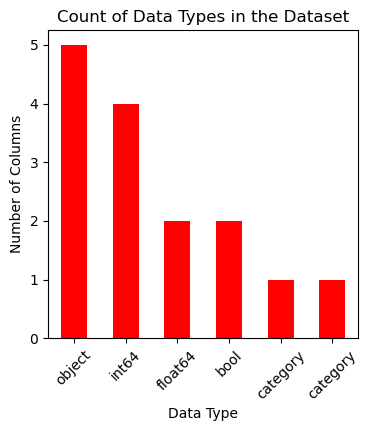

In [348]:
# Count the data types
dtype_counts = data.dtypes.value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
dtype_counts.plot(kind='bar', color='red')
plt.title('Count of Data Types in the Dataset')
plt.xlabel('Data Type')
plt.ylabel('Number of Columns')
plt.xticks(rotation=45)
plt.show()

# Dataset Structure and Preliminary Observations
* Over all 15 columns, 6 columns are numerical dtype.
* On that survived, pclass presents values based on category way.
* Other four has numerical impact.
* 2 columns are Boolean, 5 columns are objects, 2 columns are category.
# Redundant Columns:

* adult_male: Redundant, as gender and who can determine adult males.
* alive: Redundant, as survived provides the same information.
* class: Redundant, as pclass captures class status.
* embarked or embark_town: Both represent the same data; only one is necessary.
* alone: Redundant, as the combination of sibsp and parch indicates whether a passenger is alone.

In [350]:
data.who.value_counts() #To see the distribution for categorical or boolean values, we use value_counts

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [351]:
data.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [352]:
data.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [353]:
# To know the percentage of survival rate and death rate
data.survived.value_counts()/len(data)*100

survived
0    61.616162
1    38.383838
Name: count, dtype: float64

In [354]:
data.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [355]:
data.pclass.value_counts()/len(data)*100

pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64

In [356]:
data.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [357]:
data.embark_town.value_counts()/len(data)*100

embark_town
Southampton    72.278339
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64

# Columns

In [359]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# Passenger Demographics, Class Distribution, and Survival Overview
* Total Passengers were 891. 
* On that, number of adult male passengers were 537, number of adult female passengers were 271 and number of children were 83.
* The passenger distribution across classes shows that the Third Class had the highest proportion of passengers at 55%, followed by First Class with 24%, and Second Class with 21%. This indicates a significant majority of passengers belonged to the lower socio-economic group.
* The majority of passengers, 72.28%, embarked from Southampton, followed by 18.86% from Cherbourg, and the remaining 8.64% from Queenstown. This highlights Southampton as the primary departure point for the Titanic's journey.
* 39 % of people were survived and 61% of people were dead.

# Statistical Summary

In [362]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Statistical Summary of Passenger Attributes
* The age of passengers ranged from a minimum of 0 to a maximum of 80, with an average age of 29 years. 
* The number of siblings/spouses (sibsp) aboard ranged from 0 to 8, with the maximum number of 8 being unusually high. 
* The number of parents/children (parch) ranged from 0 to 6, with the highest being 6. 
* The fare paid by passengers varied from 0 to 512.33, with an average fare of 32.20, indicating a wide range in ticket prices.

In [364]:
data.describe(include=["object", "bool","category"])  # To see statistics on non-numerical features

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


# Check for the Null Values

In [366]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Data Cleaning

In [18]:
# creating a copy of the database to clean the data.
data_clean = data.copy()

In [20]:
data_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
data_clean.isna().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

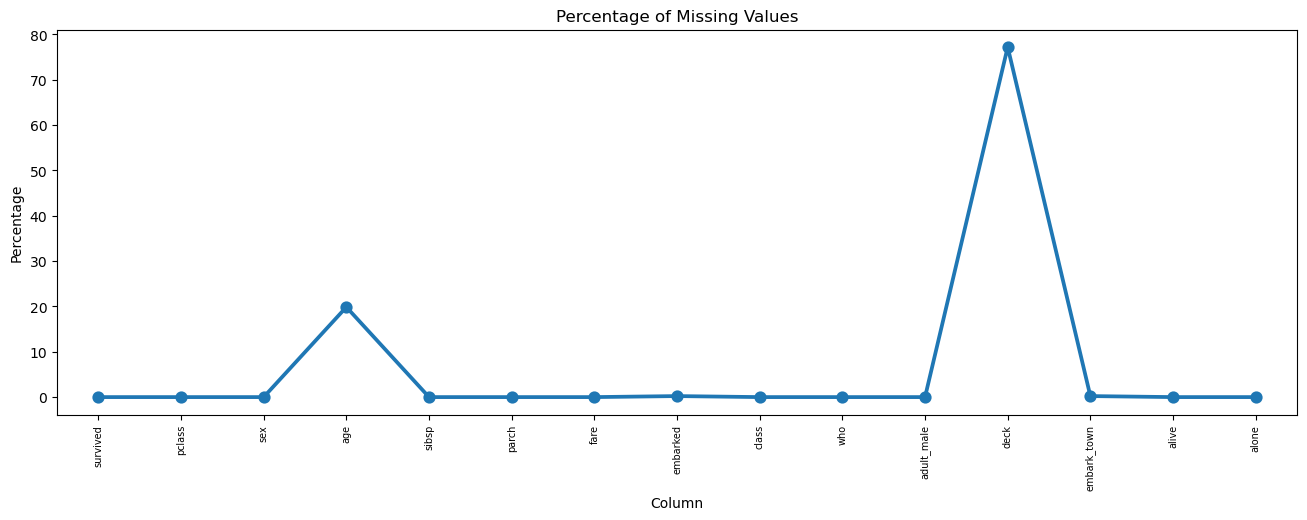

In [371]:
missing = pd.DataFrame((data_clean.isna().sum()) * 100 / data_clean.shape[0]).reset_index()
missing.columns = ['Column', 'Missing Percentage']  # Rename columns for clarity

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Missing Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()


In [372]:
data_clean.deck.isna().sum()/len(data_clean)*100 

77.21661054994388

In [373]:
data_clean.age.isna().sum()/len(data_clean)*100

19.865319865319865

In [374]:
data_clean.embarked.isna().sum()/len(data_clean)*100

0.22446689113355783

# Missing Data Analysis: 
* Deck has 77% of null values
* Age has 19.8% of null values
* embarked and embark_town, both has 0.22 % of null values, which will not impact majorly. So, no need of imputing.
* Since deck has more than 70% of missing values and it has no catch over other columns, dropping deck column is a wise one.
* Imputing missing values on deck may affect the impact of analysis.
* Only age column has to be treated.

# Check for the Duplicate Values

In [377]:
data_clean.duplicated().sum()

107

In [378]:
data_clean.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

data_clean.drop(columns=['adult_male', 'alive','alone'], inplace=True) #dropping my boolean values columns

In [380]:
data_clean.drop(columns=['alone'], inplace=True) #dropping my boolean values columns

In [381]:
data_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes


In [382]:
data_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive'],
      dtype='object')

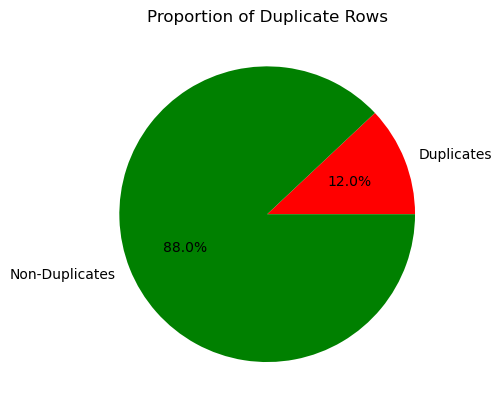

In [383]:
duplicates = data_clean.duplicated().sum()
non_duplicates = len(data_clean) - duplicates

# Create a Series for plotting
data = pd.Series([duplicates, non_duplicates], index=['Duplicates', 'Non-Duplicates',])

# Plot a pie chart
data.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.ylabel('')  # Removes the default ylabel
plt.title('Proportion of Duplicate Rows')
plt.show()

# Treat the Duplicated values

In [385]:
data_clean[data_clean.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no


*  on this dataset, there is no primary value which has uniqueness like Passenger Id column, to find the duplicates of original data.
*  Sometimes, rows might not be exact duplicates but might still have duplicates based on certain columns, like pclass, sex, or age. 

In [387]:
duplicates_based_on_columns = data_clean.duplicated(subset=['pclass', 'sex', 'age'])
print(f"Number of duplicated rows based on selected columns: {duplicates_based_on_columns.sum()}")

Number of duplicated rows based on selected columns: 602


In [388]:
duplicates_summary = data_clean.groupby(['pclass', 'sex', 'age']).size().reset_index(name='count')
duplicates_summary = duplicates_summary[duplicates_summary['count'] > 1]
print(duplicates_summary)

     pclass     sex   age  count
3         1  female  16.0      3
4         1  female  17.0      2
5         1  female  18.0      3
6         1  female  19.0      3
7         1  female  21.0      2
..      ...     ...   ...    ...
268       3    male  43.0      2
269       3    male  44.0      4
270       3    male  45.0      2
272       3    male  47.0      2
276       3    male  51.0      3

[162 rows x 4 columns]


In [389]:
data_clean.duplicated().sum()

107

# Analysis of Duplicated Rows Based on Passenger Attributes
* Upon analyzing the Titanic dataset, it was found that there were 162 duplicated rows based on the combination of pclass, age, and sex.
*  However, after comparing these with the overall dataset, only 107 values were predicted as duplicates.
*  Considering that multiple passengers with similar attributes might be valid and reflective of the dataset’s real-world context, it was decided not to drop the duplicated rows.
* This approach ensures that valuable patterns in the data, especially those related to similar passengers, are preserved for further analysis.

# Missing Value Treatment

In [466]:
missing_percentages= data.isna().sum().sort_values(ascending= False)/len(data)*100
missing_percentages

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
survived        0.000000
pclass          0.000000
sex             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
who             0.000000
adult_male      0.000000
alive           0.000000
alone           0.000000
dtype: float64

In [468]:
missing_percentages!=0 #it results boolean

deck            True
age             True
embarked        True
embark_town     True
survived       False
pclass         False
sex            False
sibsp          False
parch          False
fare           False
class          False
who            False
adult_male     False
alive          False
alone          False
dtype: bool

In [470]:
type(missing_percentages)

pandas.core.series.Series

In [472]:
missing_percentages[missing_percentages!=0] #To filter the data

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
dtype: float64

<Axes: >

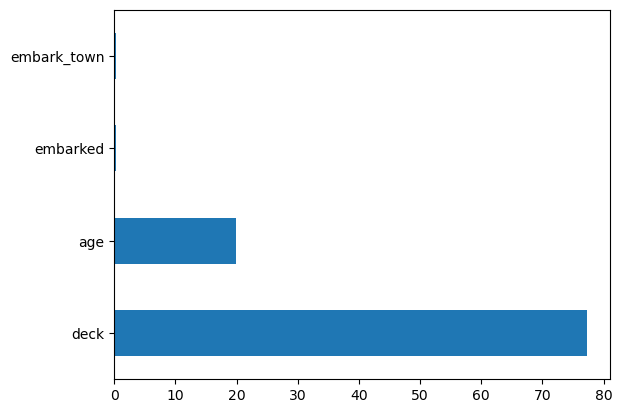

In [474]:
missing_percentages[missing_percentages!=0].plot(kind='barh') #To plot the data. to see as a figure

In [476]:
data.nunique()  #number of unique values

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [24]:
# From missing data analysis, we already taken a decision that to drop deck column since it has more than 70% null values
data_clean.drop(columns=['deck'], inplace=True)

In [25]:
data_clean.drop(columns=['embarked'], inplace=True) # embarked and embark_town impacts same values

In [26]:
data_clean

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


# AGE

In [30]:
data_clean.age.dtype

dtype('float64')

In [31]:
data_clean.age.mean() 

29.69911764705882

In [32]:
data_clean.loc[:, 'age'] = data_clean['age'].fillna(data_clean['age'].mean()) # age has a numerical value. So fill null values with mean.

In [33]:
data_clean['age'].isnull().sum()

0

# Embark_town

In [493]:
data[data.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [494]:
# embarked town has very less nan values, no need of imputation

# Check the Null Value after treating it

In [497]:
data_clean.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

<Axes: >

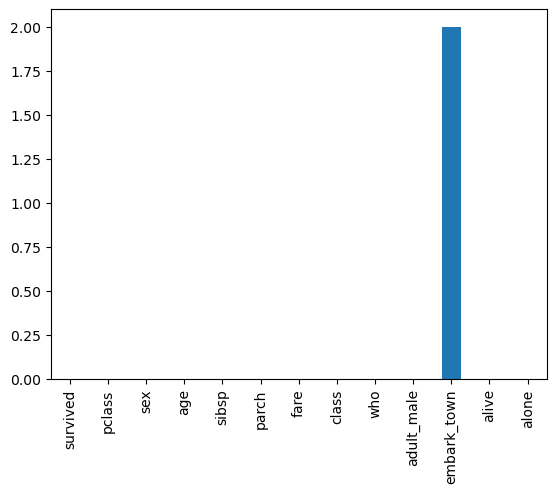

In [499]:
data_clean.isna().sum().plot(kind='bar')

# OUTLIERS DETECTION
* Check the Outliers

In [501]:
# To detect outliers, we use Boxplot

In [38]:
data_outliers= data_clean.copy()

In [40]:
data_outliers

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,First,man,True,Cherbourg,yes,True


In [507]:
d_o=data_outliers.drop(columns=['adult_male','alive','class'])

In [509]:
d_o.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who',
       'embark_town', 'alone'],
      dtype='object')

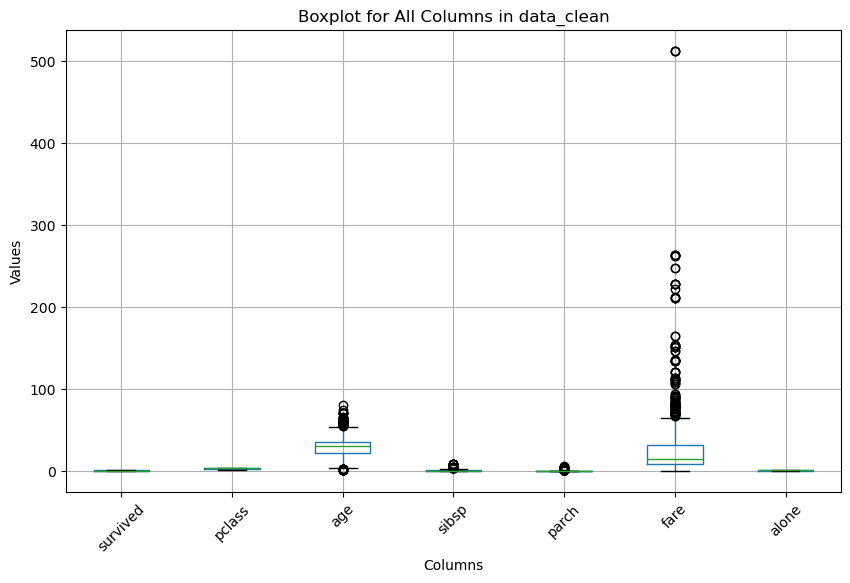

In [511]:
plt.figure(figsize=(10, 6))  # figure size
d_o.boxplot()
plt.title('Boxplot for All Columns in data_clean')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate column labels for better visibility if needed
plt.show()

# Analysis of Outliers in Age and Fare
* The analysis identified outliers in both age and fare.
*  A particularly noticeable outlier was observed in the fare data, representing an exceptionally high fare value.
*  This extreme value significantly influences the overall fare distribution, making it a point of interest for further investigation.

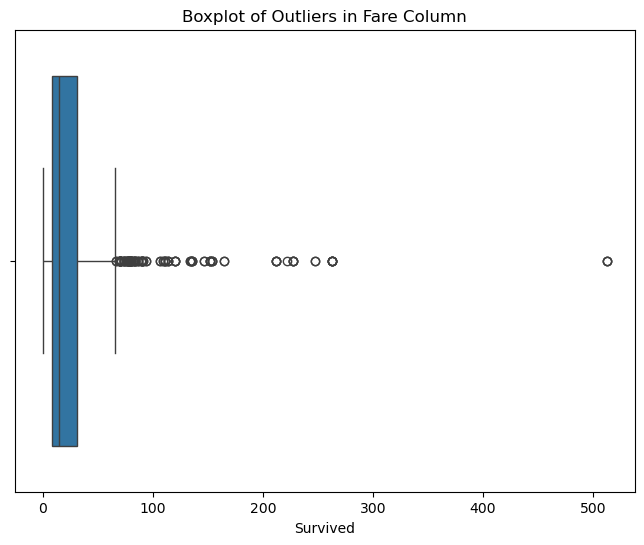

In [515]:
plt.figure(figsize=(8,6))
sns.boxplot(x= 'fare',data= data_outliers)
plt.xlabel('Survived')
plt.title('Boxplot of Outliers in Fare Column')
plt.show()

# Log method

* If your data contains large outliers with a long tail to the right, applying a log transformation can reduce their impact.
* Example: Income, sales, or prices.


In [549]:
data_outliers['fare']=np.log1p(data_outliers['fare']) 

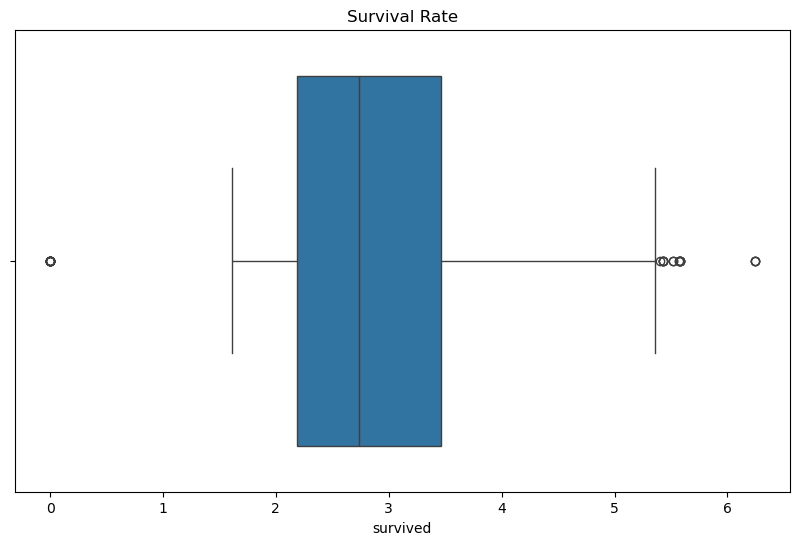

In [518]:
plt.figure(figsize=(10,6))
sns.boxplot(x= 'fare',data=data_outliers)
plt.xlabel('survived')
plt.title('Survival Rate')
plt.show()

# IQR Method
* The Interquartile Range (IQR) method is a simple and effective way to identify and remove outliers from a dataset. It works by detecting values that lie significantly outside the middle 50% of the data (the interquartile range).



* Identify outliers in the 'fare' column using the IQR method
* Outliers are defined as values outside the range:
* Lower Bound- below the lower bound (Q1 - 1.5 * IQR)
* Upper Bound- above the upper bound (Q3 + 1.5 * IQR)
* The OR operator (`|`) is used to select rows where the 'fare' is either lower than the lower bound or higher than the upper bound

In [551]:
# Calculate Q1, Q3, and IQR
Q1 = data_outliers['fare'].quantile(0.25)
Q1

1.1591482384029697

In [553]:
Q3 = data_outliers['fare'].quantile(0.75)
Q3

1.496434016604423

In [555]:
IQR = Q3 - Q1
IQR

0.33728577820145333

In [559]:
# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 0.6532195711007897, Upper Bound: 2.002362683906603


In [525]:
# The OR operator (`|`) is used to select rows where the 'fare' is either lower than the lower bound or higher than the upper bound
outliers = data_outliers[(data_outliers['fare'] < lower_bound) | (data_outliers['fare'] > upper_bound)] 

# Investigate Outliers
* Before deciding what to do with the outliers(remove or replace), it's essential to analyze them to understand their nature.
* After identifying the outliers using the IQR method and extracting the relevant columns (fare, class, and survived)

In [561]:
# Check the context of the outliers:
print(outliers[['fare', 'pclass', 'survived']])  

         fare  pclass  survived
27   5.575949       1         0
88   5.575949       1         1
118  5.515527       1         0
179  0.000000       3         0
258  6.240917       1         1
263  0.000000       1         0
271  0.000000       3         1
277  0.000000       2         0
299  5.515527       1         1
302  0.000000       3         0
311  5.573579       1         1
341  5.575949       1         1
380  5.431646       1         1
413  0.000000       2         0
438  5.575949       1         0
466  0.000000       2         0
481  0.000000       2         0
527  5.406181       1         0
557  5.431646       1         0
597  0.000000       3         0
633  0.000000       1         0
674  0.000000       2         0
679  6.240917       1         1
700  5.431646       1         1
716  5.431646       1         1
732  0.000000       2         0
737  6.240917       1         1
742  5.573579       1         1
806  0.000000       1         0
815  0.000000       1         0
822  0.0

In [563]:
# Check how many outliers belong to each class or survival status
# Set observed=False to retain the current behavior
print(outliers.groupby(['class', 'survived'], observed=False).size())

class   survived
First   0           10
        1           11
Second  0            6
        1            0
Third   0            3
        1            1
dtype: int64


# Impact of Outliers on First-Class Passenger Fare"
* The analysis revealed that first-class passengers exhibited 10 outliers in fare data, which significantly impacts the overall distribution of fares for this class.
* These outliers contribute to the observation of higher fare values and noticeably skew the data towards the upper range.
* This highlights the need for a closer examination of fare patterns within the first-class category.

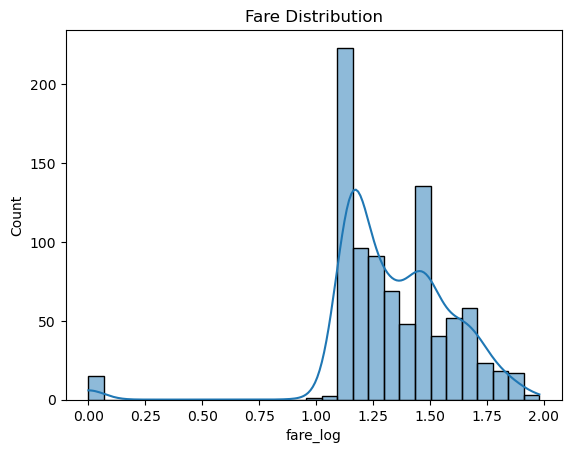

In [539]:
data_outliers['fare_log'] = np.log1p(data_outliers['fare'])  # log(1+fare)
sns.histplot(data_outliers['fare_log'], kde=True)
plt.title('Fare Distribution')
plt.show()

In [565]:
# Clip the 'fare' column to the defined lower and upper bounds
# This step ensures that any 'fare' values outside the acceptable range (outliers)  
# are replaced with the nearest boundary value (lower_bound or upper_bound).
# It helps in preventing extreme outliers from affecting the analysis or model.
data_outliers['fare'] = data_outliers['fare'].clip(lower=lower_bound, upper=upper_bound)  #clip() function for Capping method

In [579]:
# Remove outliers by keeping only the rows within the bounds
cleaned_data = data_outliers[(data_outliers['fare'] >= lower_bound) & (data_outliers['fare'] <= upper_bound)]

In [581]:
cleaned_data

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.000000,1,0,1.134691,Third,man,True,Southampton,no,False,1.134691
1,1,1,female,38.000000,1,0,1.664038,First,woman,False,Cherbourg,yes,False,1.664038
2,1,3,female,26.000000,0,0,1.159662,Third,woman,False,Southampton,yes,True,1.159662
3,1,1,female,35.000000,1,0,1.607603,First,woman,False,Southampton,yes,False,1.607603
4,0,3,male,35.000000,0,0,1.164014,Third,man,True,Southampton,no,True,1.164014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,1.291725,Second,man,True,Southampton,no,True,1.291725
887,1,1,female,19.000000,0,0,1.489299,First,woman,False,Southampton,yes,True,1.489299
888,0,3,female,29.699118,1,2,1.434282,Third,woman,False,Southampton,no,False,1.434282
889,1,1,male,26.000000,0,0,1.489299,First,man,True,Cherbourg,yes,True,1.489299


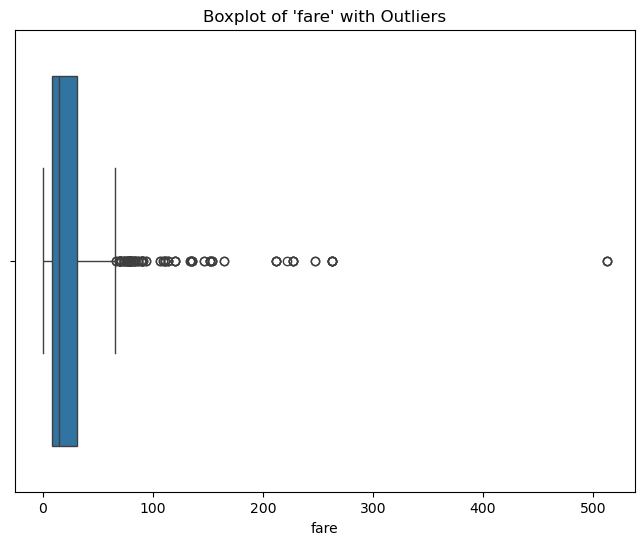

In [583]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['fare'])
plt.title("Boxplot of 'fare' with Outliers")
plt.show()

In [573]:
# Separate outliers for further analysis
outliers_analysis = outliers[['fare', 'class', 'survived']]
print(outliers_analysis)

         fare   class  survived
27   5.575949   First         0
88   5.575949   First         1
118  5.515527   First         0
179  0.000000   Third         0
258  6.240917   First         1
263  0.000000   First         0
271  0.000000   Third         1
277  0.000000  Second         0
299  5.515527   First         1
302  0.000000   Third         0
311  5.573579   First         1
341  5.575949   First         1
380  5.431646   First         1
413  0.000000  Second         0
438  5.575949   First         0
466  0.000000  Second         0
481  0.000000  Second         0
527  5.406181   First         0
557  5.431646   First         0
597  0.000000   Third         0
633  0.000000   First         0
674  0.000000  Second         0
679  6.240917   First         1
700  5.431646   First         1
716  5.431646   First         1
732  0.000000  Second         0
737  6.240917   First         1
742  5.573579   First         1
806  0.000000   First         0
815  0.000000   First         0
822  0.0

# The result above shows, outliers cause because of the high fare rate for the First class Passengers

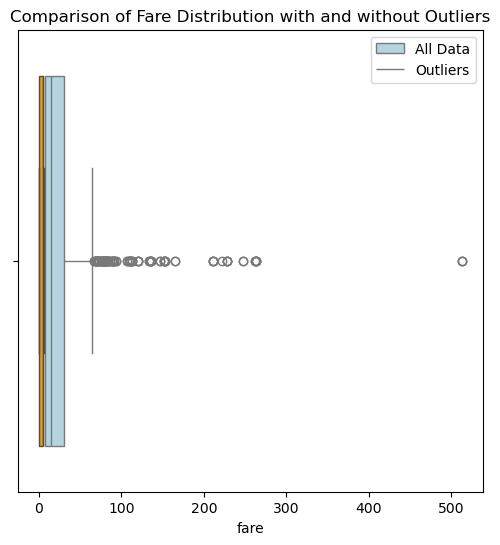

In [585]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot for the full dataset and outliers separately
plt.figure(figsize=(6, 6))

# Boxplot for the full dataset
sns.boxplot(x=data['fare'], color='lightblue')

# Boxplot for the outliers dataset
sns.boxplot(x=outliers_analysis['fare'], color='orange')

# Adding a legend manually
plt.legend(['All Data', 'Outliers'], loc='upper right')

# Adding title
plt.title('Comparison of Fare Distribution with and without Outliers')

# Display the plot
plt.show()


In [587]:
outliers_analysis.value_counts()

fare      class   survived
0.000000  Second  0           6
          First   0           5
          Third   0           3
5.431646  First   1           3
6.240917  First   1           3
5.573579  First   1           2
5.575949  First   0           2
                  1           2
0.000000  Third   1           1
5.406181  First   0           1
5.431646  First   0           1
5.515527  First   0           1
                  1           1
Name: count, dtype: int64

<Axes: xlabel='pclass'>

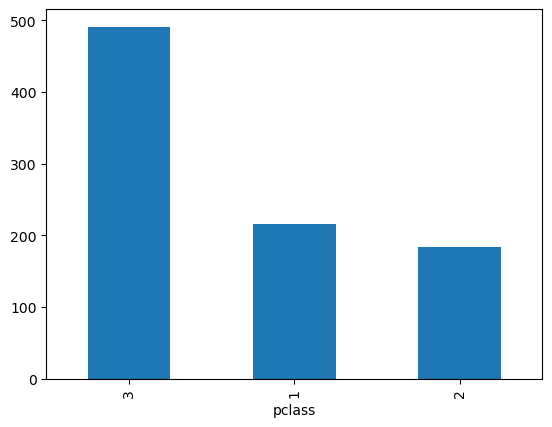

In [589]:
data_outliers['pclass'].value_counts().plot(kind='bar')

* Insight: The Third Class had the majority of passengers, indicating that the Titanic carried more individuals from lower socioeconomic groups compared to the upper classes. 

# BIVARIATE ANALYSIS & INSIGHTS

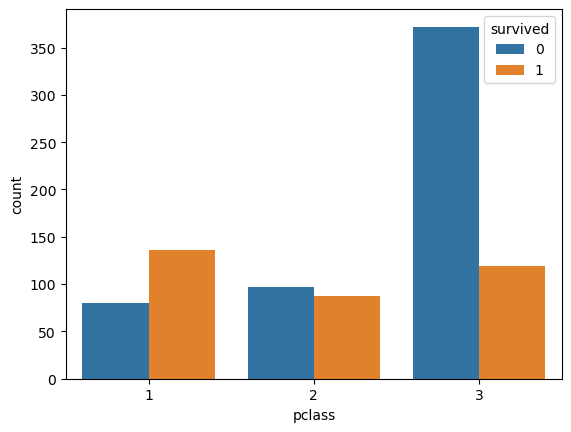

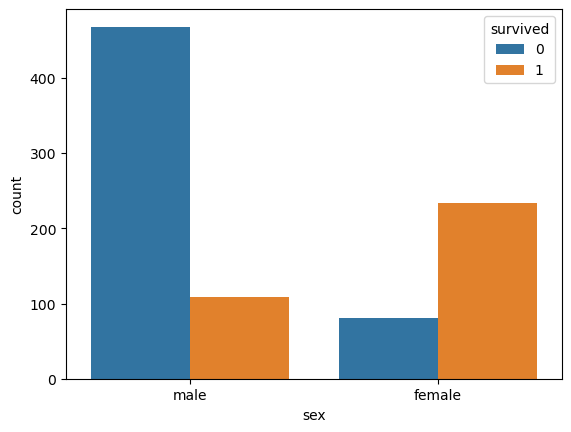

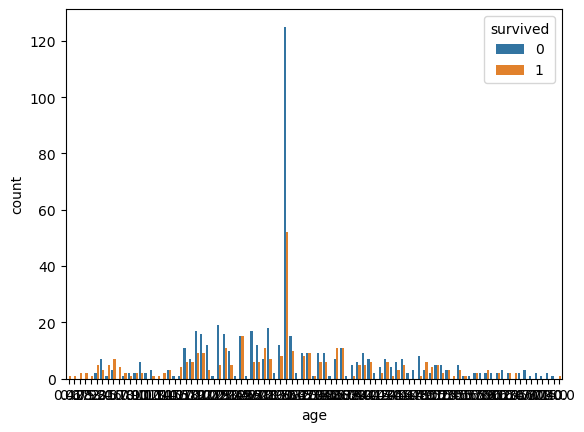

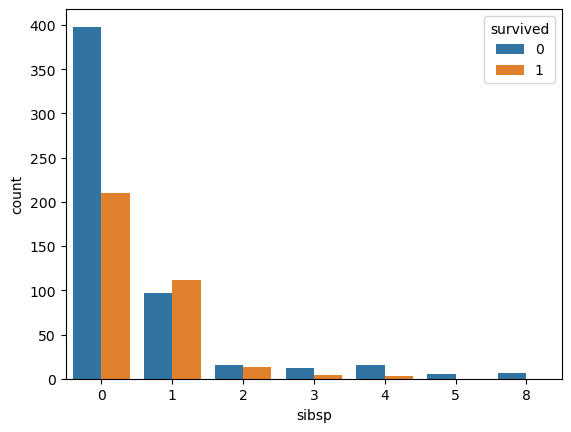

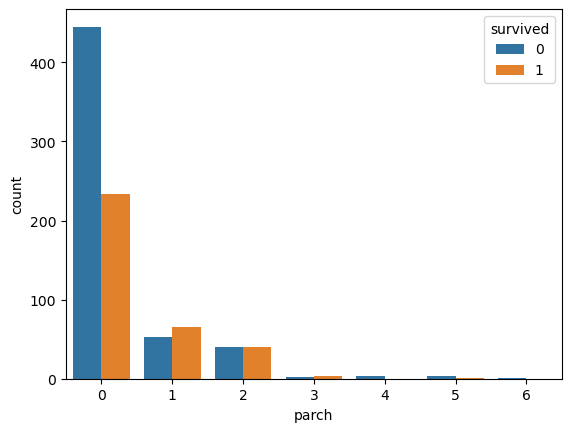

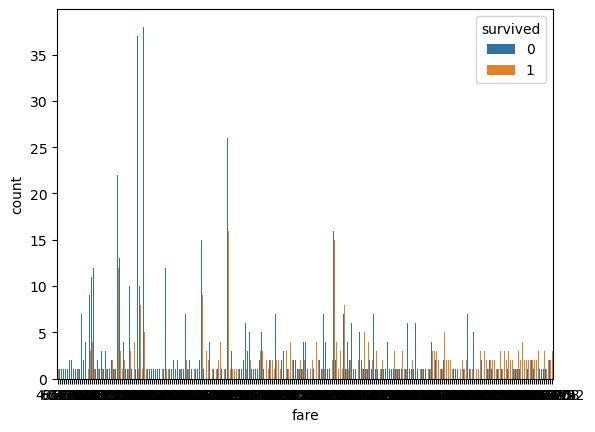

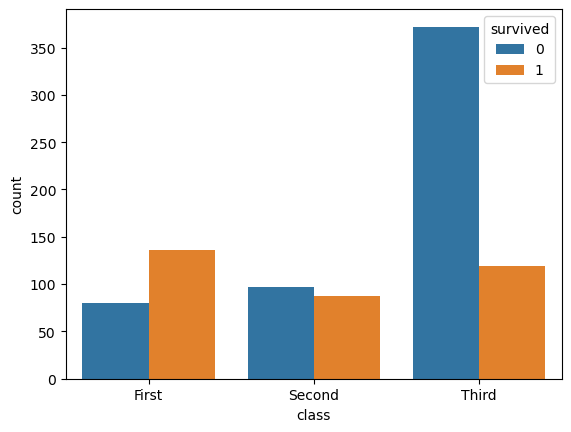

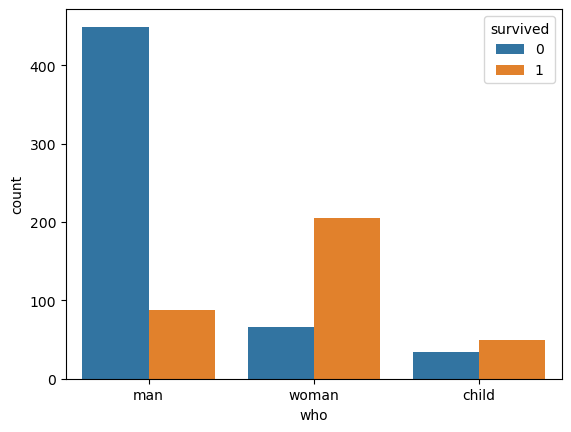

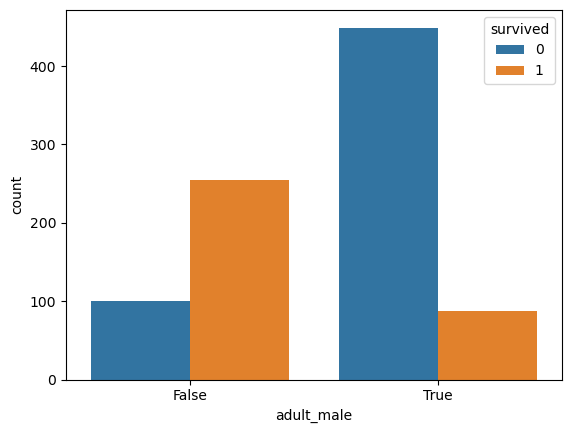

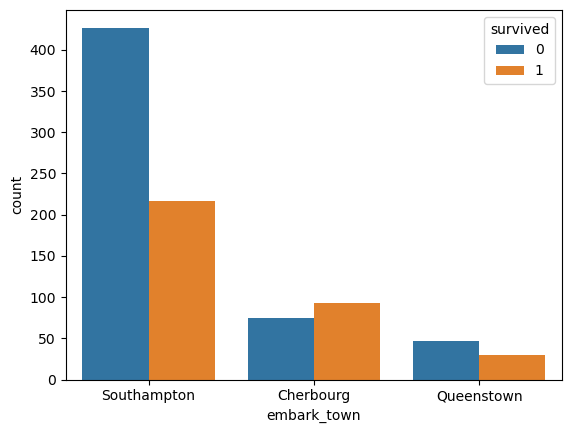

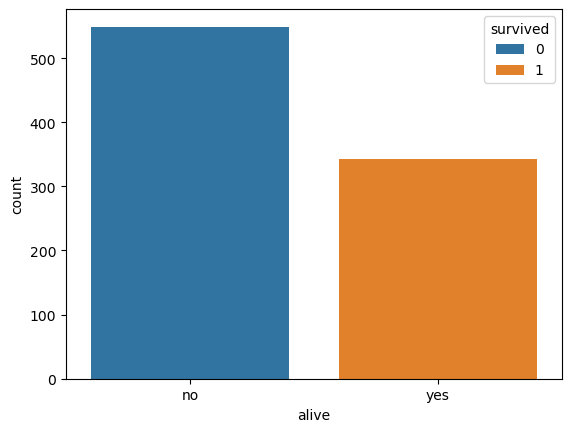

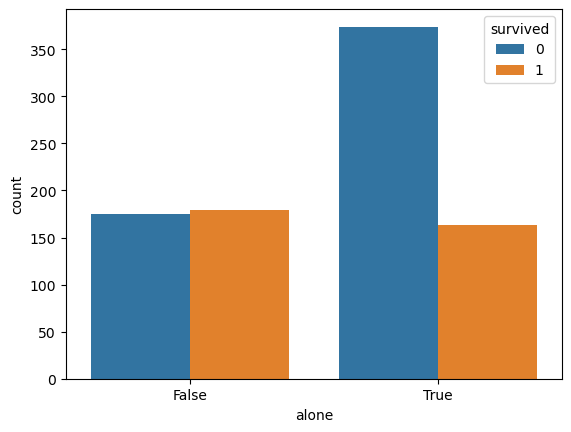

In [598]:
for i, predictor in enumerate(data_clean.drop(columns=['survived'])):
    plt.figure()
    sns.countplot(data=data_clean,x=predictor,hue='survived')

# Pclass vs Survived 
Observation:
First Class had the highest survival rate (more orange than blue).
Third Class had the lowest survival rate (dominantly blue).
Insight: Passengers in higher classes (1st) had a significantly better chance of survival compared to lower classes (3rd).
# Sex vs Survived 
Observation:
Females had a much higher survival rate (majority orange bars).
Males had a very low survival rate (mostly blue bars).
Insight: Survival rates were significantly higher for females compared to males, aligning with the "women and children first" evacuation policy.
# Who vs Survived 
Observation:
Women and children had higher survival rates.
Men had the lowest survival rate.
Insight: The "women and children first" policy is further confirmed here, as men had disproportionately lower survival chances.
# SibSp vs Survived 
Observation:
Passengers with 0 siblings/spouses had the highest count of non-survivors (blue bar).
Having 1-2 siblings/spouses slightly improved survival rates.
Larger numbers (5-8) of siblings/spouses correlate with very low survival chances.
Insight: Traveling alone or with very large groups reduced survival chances, while smaller family sizes (1-2) increased survival probability.
# Parch vs Survived 
Observation:
Most passengers had 0 parents/children and showed low survival rates.
Passengers with 1-2 parents/children had relatively higher survival rates.
Larger family sizes (3-6) again had very low survival rates.
Insight: Survival likelihood was highest for those with small family groups (1-2 dependents), while traveling alone or with very large families reduced chances.
# Embark Town vs Survived 
Observation:
Passengers from Cherbourg had higher survival rates.
Passengers from Southampton had a large count of non-survivors (blue dominates).
Passengers from Queenstown had lower survival rates overall.
Insight: Survival varied by embarkation point, with Cherbourg passengers having a notable advantage.
# Age vs Survived 
Observation:
A higher survival rate was visible among younger passengers (children).
Middle-aged and older passengers showed more non-survivors.
Insight: Children had better survival outcomes, consistent with the evacuation policy prioritizing "women and children."
# Fare vs Survived 
Observation:
Higher fares generally corresponded with higher survival rates (more orange spikes at higher fare ranges).
Passengers paying lower fares had a higher chance of not surviving.
Insight: Wealthier passengers (higher fare) had significantly better survival rates, aligning with their higher likelihood of being in First Class.
# Overall Key Insights:
Pclass, Sex, and Family Size are critical determinants of survival.
First Class passengers, women, and those with small family groups had the highest chances of survival.
Embarkation Point: Passengers from Cherbourg had better survival rates.
Fare: Higher fares (wealthier passengers) were strongly associated with higher survival rates.
Age: Children had a clear advantage in survival compared to adults.













# Numerical Analysis -Correlation

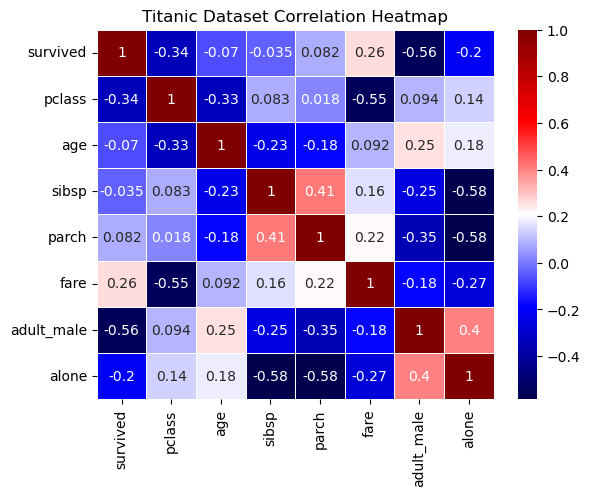

In [602]:
sns.heatmap(
    data_clean.corr(numeric_only=True),
    linewidth=0.5,
    cmap='seismic',
    annot=True
).set_title('Titanic Dataset Correlation Heatmap')

plt.savefig('C:\\Users\\R Lavanya\\Downloads\\New folder', bbox_inches='tight')

# NUMERICAL ANALYSIS

In [607]:
data_clean.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.253236,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.253236,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.404744,1.000000


# Insights from Titanic Dataset Correlation Heatmap:

# Survival and Key Variables:

* Pclass: Strong negative correlation with survived (-0.34). Lower passenger classes (higher Pclass values) were less likely to survive.
* Fare: Positive correlation with survived (0.26). Passengers who paid higher fares had a better chance of survival.
* Adult Male: Strong negative correlation (-0.56) with survived, suggesting adult males were less likely to survive.
* Alone: Weak negative correlation (-0.20) with survived. Being alone slightly reduced the survival chances.

# Relationships Among Independent Variables:

* SibSp and Parch: Strong positive correlation (0.41) indicates passengers with more siblings/spouses (SibSp) also tended to have more parents/children aboard (Parch).
* Fare and Pclass: Strong negative correlation (-0.55), which implies that passengers in lower classes (higher Pclass values) paid lower fares.
* Alone and Parch/SibSp: Strong negative correlations (-0.58), indicating that passengers with family (siblings, spouses, parents, children) were not marked as "alone."

*Age:

* Age and Pclass: Negative correlation (-0.33), indicating younger passengers were more likely to be in higher classes.
* Age and SibSp/Parch: Weak negative correlations suggest older individuals were less likely to travel with family.

# Other Observations:

* Variables like fare and Pclass play a significant role in survival outcomes.
* Gender (adult_male) is one of the most influential factors in survival.
# Summary:
* Survival likelihood is higher for passengers in higher classes, who paid higher fares, and were not adult males.
* Family relationships influence survival, with passengers traveling with family members faring better overall.
* Age and gender show moderate to strong correlations with key survival indicators.

# Trivariate Analysis & Insights

<Figure size 600x600 with 0 Axes>

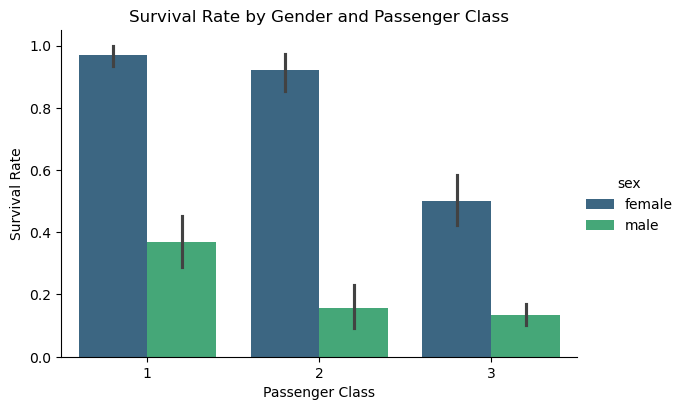

In [630]:
##  Survival Rate by Gender and Class
plt.figure(figsize=(6, 6))
sns.catplot(data=data_clean, x='pclass', y='survived', hue='sex', kind='bar', palette='viridis', height=4, aspect=1.5)
plt.title('Survival Rate by Gender and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

<Figure size 600x600 with 0 Axes>

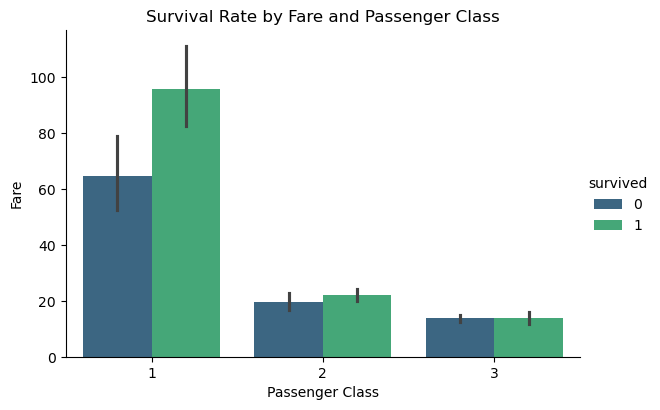

In [636]:
plt.figure(figsize=(6, 6))
sns.catplot(data=data_clean, x='pclass', y='fare', hue='survived', kind='bar', palette='viridis', height=4, aspect=1.5)
plt.title('Survival Rate by Fare and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

<Figure size 600x600 with 0 Axes>

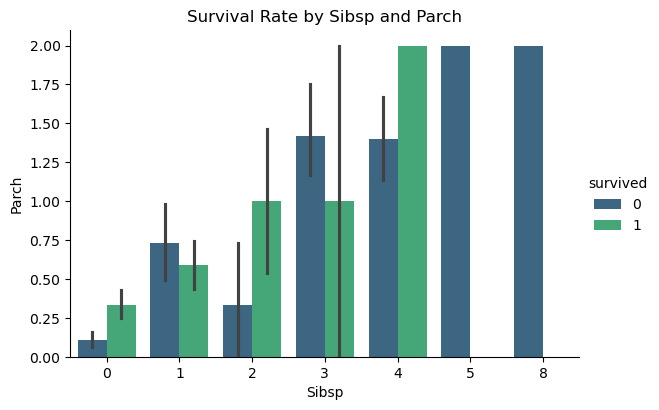

In [42]:
plt.figure(figsize=(6, 6))
sns.catplot(data=data_clean, x='sibsp', y='parch', hue='survived', kind='bar', palette='viridis', height=4, aspect=1.5)
plt.title('Survival Rate by Sibsp and Parch')
plt.xlabel('Sibsp')
plt.ylabel('Parch')
plt.show()

<Figure size 600x600 with 0 Axes>

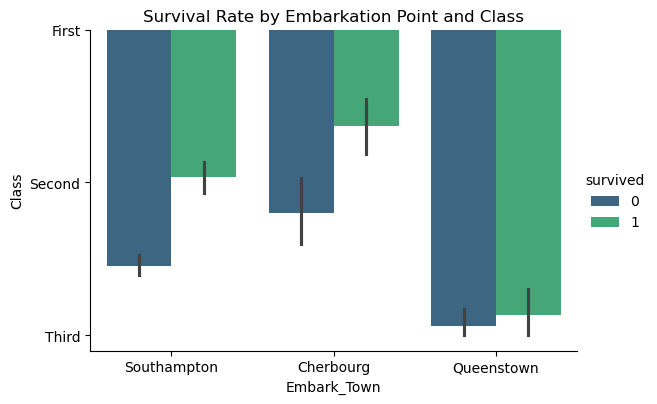

In [50]:
plt.figure(figsize=(6, 6))
sns.catplot(data=data_clean, x='embark_town', y='class', hue='survived', kind='bar', palette='viridis', height=4, aspect=1.5)
plt.title('Survival Rate by Embarkation Point and Class')
plt.xlabel('Embark_Town')
plt.ylabel('Class')
plt.show()

# Insights from the Trivariate Analysis

# Survival Rates by Gender:

* Females had much higher survival rates compared to males, especially in First and Second Class.

# Impact of Passenger Class and Fare:

* Survival rates were highest for First-Class passengers who paid higher fares.
* Passengers in Third Class (lowest fare) had the poorest survival rates.

# Combined Factors:

* Gender + Class: Females in higher classes had survival advantages.
* Fare + Class: Higher fares further reinforced the advantage for First-Class passengers.
  
# Family Dynamics (SibSp & Parch):

* Larger families (5-8 members) struggled to survive as group mobility during an emergency was likely slower and chaotic.
* Traveling alone (no siblings, spouses, or dependents) also reduced survival chances, suggesting passengers with small family ties could rely on mutual support to escape.

# Embarkation Point & Class Influence:

* Passengers from Cherbourg (where more First-Class passengers boarded) had better survival outcomes, suggesting that the embarkation point indirectly reflects social class distribution.
* Southampton passengers dominated Third Class, leading to lower overall survival rates.


# Insights Summary

* Critical Determinants: Pclass, Sex, and Family Size were the most influential factors for survival.
* Passenger Class: First Class passengers had significantly better survival rates than Third Class passengers.
* Gender: Women had much higher survival rates than men.
* Family Size: Smaller family groups (1-2 members) increased survival chances, while traveling alone or with large groups reduced survival rates.
* Embarkation Point: Passengers from Cherbourg had better survival outcomes compared to Southampton and Queenstown.
* Fare:Higher fares (wealthier passengers) were strongly associated with better survival rates.
* Age: Children had a clear survival advantage compared to adults.
* First-Class females and children enjoyed the highest survival rates, while Third-Class males suffered the most.
* Family presence helped survival to a degree (1-2 family members), but large families faced challenges during evacuation.
* Embarkation point indirectly reflects class distribution, impacting survival rates.
* Mobility and accessibility played a crucial role, with lower-class and elderly passengers being at a disadvantage.

# THANK YOU!